In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import font_manager, rc

import numpy as np
import pandas as pd
#seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

In [2]:
print(plt.rcParams["font.family"])

['sans-serif']


In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib 
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [4]:
print(plt.rcParams["font.family"])

['Malgun Gothic']


In [5]:
coupang = pd.read_excel('coupangdata.xlsx') 
coupang = pd.DataFrame(coupang)
coupang.head()

,묶음배송번호,주문번호,택배사,운송장번호,분리배송 Y/N,분리배송 출고예정일,주문시 출고예정일,출고일(발송일),주문일,등록상품명,...,최초등록옵션명,업체상품코드,바코드,결제액,배송비구분,배송비,도서산간 추가배송비,구매수(수량),옵션판매가(판매단가),구매자
0,1863148812,5000087866634,NaN,NaN,NaN,배송중,2020-12-02,NaN,2020-12-01 09:03:21,마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음[무료배송],...,001. 파티하는산타[무료배송],11172108||fed78e0d6d,NaN,3900,무료,0,0,1,3900,최정미
1,1864045159,22000087613050,NaN,NaN,NaN,배송중,2020-12-04,NaN,2020-12-01 15:12:35,다이얼식 비밀번호식 열쇠[무료배송],...,003단-소[무료배송],11568306||7dd580b226,NaN,5440,무료,0,0,1,5440,조경만
2,1864089590,32000087295636,NaN,NaN,NaN,배송중,2020-12-03,NaN,2020-12-01 15:29:09,하오츠 백탕 훠궈소스 마라탕 샹궈 재료 중국식품[무료배송],...,하오츠 백탕 훠궈소스 마라탕 샹궈 재료 중국식품[무료배송],9407748||00,NaN,23160,무료,0,0,4,5790,박순화
3,1864204459,6000088215603,NaN,NaN,NaN,배송중,2020-12-03,NaN,2020-12-01 16:18:17,bob 갤럭시핏2 fit2 3D 곡면엣지 풀커버 PET 보호필름[무료배송],...,3D풀커버필름_Fit2/블랙[무료배송],11201053||317c53cc4f,NaN,9680,무료,0,0,2,4840,김승용
4,1864399502,12000087552145,NaN,NaN,NaN,배송중,2020-12-02,NaN,2020-12-01 17:35:39,아동 성인 남녀공용 어른 겨울 뜨개실 귀마개[무료배송],...,00랜덤컬러[무료배송],11291960||662b48f7d3,NaN,12560,무료,0,0,2,6280,박현기


In [6]:
print(coupang.size)
print(len(coupang))

72648
3027


In [7]:
# dataframe으로 만들고 '노출상품명(옵션명)' 컬럼 string으로 타입변경
#  https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html 
# 위 사이트 참고
coupang['노출상품명(옵션명)'] = coupang['노출상품명(옵션명)'].astype("string")

In [8]:
coupang.dtypes

묶음배송번호         object
주문번호           object
택배사            object
운송장번호          object
분리배송 Y/N       object
분리배송 출고예정일     object
주문시 출고예정일      object
출고일(발송일)       object
주문일            object
등록상품명          object
등록옵션명          object
노출상품명(옵션명)     string
노출상품ID         object
옵션ID           object
최초등록옵션명        object
업체상품코드         object
바코드            object
결제액            object
배송비구분          object
배송비            object
도서산간 추가배송비     object
구매수(수량)        object
옵션판매가(판매단가)    object
구매자            object
dtype: object

# 노출상품명(옵션명) 기준 group

In [9]:
grouped = coupang.groupby('노출상품명(옵션명)')

In [10]:
grouped

In [11]:
grouped.count()

,묶음배송번호,주문번호,택배사,운송장번호,분리배송 Y/N,분리배송 출고예정일,주문시 출고예정일,출고일(발송일),주문일,등록상품명,...,최초등록옵션명,업체상품코드,바코드,결제액,배송비구분,배송비,도서산간 추가배송비,구매수(수량),옵션판매가(판매단가),구매자
노출상품명(옵션명),,,,,,,,,,,,,,,,,,,,,
"(사이즈3종) 자세교정 허리 /자가발열 /허리보호대 굽은 [생활플러스] 허리복대 벨트, 00_02사이즈/ XXL",1,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
"(스타몰)도루코 커터날 대형 10개x10팩, 상세페이지 참조",3,3,0,0,0,0,3,0,3,3,...,3,3,0,3,3,3,3,3,3,3
(오팔스토아)주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445,1,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
"(큐트캣) 앞치마 어깨끈 요리 주방 H형 투포켓, 상세페이지 참조",1,1,0,0,0,0,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
"+코코사라+[GTrend]버핏 패턴 지퍼케이스 전기종모음 추가금X, S20+ G986/핑크",1,1,0,0,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"화이트우드사각휴지케이스[무료배송], 상세페이지 참조",1,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
"화장실 압축기 주름 변기 뚫어펑 뚫어뻥 (15cm 레드), 상세페이지 참조",1,0,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1
"후드방역모자 모자페이스쉴드 후디방역모자 모자투명막 방역모자 방역후드모자 투명막후드모자[무료배송], 02그레이",1,1,0,0,0,0,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1


In [12]:
df_group=grouped.sum()
df_group

,묶음배송번호,주문일,등록상품명,등록옵션명,노출상품ID,옵션ID,최초등록옵션명,업체상품코드,바코드,배송비구분,배송비,도서산간 추가배송비,구매수(수량),구매자
노출상품명(옵션명),,,,,,,,,,,,,,
"(사이즈3종) 자세교정 허리 /자가발열 /허리보호대 굽은 [생활플러스] 허리복대 벨트, 00_02사이즈/ XXL",1909801673,2020-12-17 14:22:16,[생활플러스] 굽은 허리 자세교정 벨트 /허리보호대 /자가발열 허리복대 (사이즈3종...,00_02사이즈/ XXL[무료배송],4545101585,72813731763,00_02사이즈/ XXL[무료배송],11820400||d41294195d,0,무료,0,0,1,이수정
"(스타몰)도루코 커터날 대형 10개x10팩, 상세페이지 참조",188810073920288228142277905990,2020-12-10 08:16:422021-01-29 16:59:392021-04-...,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10개...,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10...,438728853543872885354387288535,727510581877275105818772751058187,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10...,9719011||009719011||009719011||00,0,무료무료무료,000,000,4,송진주박정식최미영
(오팔스토아)주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445,1916296697,2020-12-19 19:23:45,주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],2092582935,72331080824,주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],10758488||00,0,무료,0,0,2,정다운
"(큐트캣) 앞치마 어깨끈 요리 주방 H형 투포켓, 상세페이지 참조",2339047465,2021-05-16 21:42:34,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,5267381501,75689000301,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,13412054||00,0,무료,0,0,1,한지연
"+코코사라+[GTrend]버핏 패턴 지퍼케이스 전기종모음 추가금X, S20+ G986/핑크",2116178401,2021-03-02 22:18:53,[제프파이썬+할인점] @전기종모음 추가금X [GTrend]버핏 지퍼케이스 패턴무료배...,[제프파이썬+할인점] @S20+ G986/핑크무료배송상품~!!,4733752280,74000668148,[제프파이썬+할인점] @S20+ G986/핑크무료배송상품~!!,9092143||fbd21ef7c2,0,무료,0,0,1,이은정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"화이트우드사각휴지케이스[무료배송], 상세페이지 참조",1995359239,2021-01-17 00:35:33,화이트우드사각휴지케이스[무료배송],화이트우드사각휴지케이스[무료배송],2360203257,72081048147,화이트우드사각휴지케이스[무료배송],11190111||00,0,무료,0,0,1,양희중
"화장실 압축기 주름 변기 뚫어펑 뚫어뻥 (15cm 레드), 상세페이지 참조",1906632249,2020-12-16 15:03:20,화장실 압축기 주름 변기 뚫어펑 뚫어뻥 (15cm 레드)[무료배송],화장실 압축기 주름 변기 뚫어펑 뚫어뻥 (15cm 레드)[무료배송],4602750903,72979440769,화장실 압축기 주름 변기 뚫어펑 뚫어뻥 (15cm 레드)[무료배송],11987532||00,0,무료,0,0,1,김예지
"후드방역모자 모자페이스쉴드 후디방역모자 모자투명막 방역모자 방역후드모자 투명막후드모자[무료배송], 02그레이",1910822764,2020-12-17 20:26:06,후드방역모자 모자페이스쉴드 후디방역모자 모자투명막 방역모자 방역후드모자 투명막후드모...,02그레이[무료배송],4550562528,72837959103,02그레이[무료배송],11826092||a244908d03,0,무료,0,0,2,JIN LIANHONG


In [13]:
df_group.head()

,묶음배송번호,주문일,등록상품명,등록옵션명,노출상품ID,옵션ID,최초등록옵션명,업체상품코드,바코드,배송비구분,배송비,도서산간 추가배송비,구매수(수량),구매자
노출상품명(옵션명),,,,,,,,,,,,,,
"(사이즈3종) 자세교정 허리 /자가발열 /허리보호대 굽은 [생활플러스] 허리복대 벨트, 00_02사이즈/ XXL",1909801673,2020-12-17 14:22:16,[생활플러스] 굽은 허리 자세교정 벨트 /허리보호대 /자가발열 허리복대 (사이즈3종...,00_02사이즈/ XXL[무료배송],4545101585,72813731763,00_02사이즈/ XXL[무료배송],11820400||d41294195d,0,무료,0,0,1,이수정
"(스타몰)도루코 커터날 대형 10개x10팩, 상세페이지 참조",188810073920288228142277905990,2020-12-10 08:16:422021-01-29 16:59:392021-04-...,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10개...,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10...,438728853543872885354387288535,727510581877275105818772751058187,도루코 커터날 소형 10개x10팩[무료배송][제프파이썬] 도루코 커터날 소형 10...,9719011||009719011||009719011||00,0,무료무료무료,000,000,4,송진주박정식최미영
(오팔스토아)주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445,1916296697,2020-12-19 19:23:45,주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],2092582935,72331080824,주방 스텐 요리 업소용 파스타 ms 뉴 얼음집게 445[무료배송],10758488||00,0,무료,0,0,2,정다운
"(큐트캣) 앞치마 어깨끈 요리 주방 H형 투포켓, 상세페이지 참조",2339047465,2021-05-16 21:42:34,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,5267381501,75689000301,[jepython]@[세일상품](큐트캣) 앞치마 어깨끈 H형 요리 투포켓 주방jff...,13412054||00,0,무료,0,0,1,한지연
"+코코사라+[GTrend]버핏 패턴 지퍼케이스 전기종모음 추가금X, S20+ G986/핑크",2116178401,2021-03-02 22:18:53,[제프파이썬+할인점] @전기종모음 추가금X [GTrend]버핏 지퍼케이스 패턴무료배...,[제프파이썬+할인점] @S20+ G986/핑크무료배송상품~!!,4733752280,74000668148,[제프파이썬+할인점] @S20+ G986/핑크무료배송상품~!!,9092143||fbd21ef7c2,0,무료,0,0,1,이은정


In [14]:
df_group.columns

Index(['묶음배송번호', '주문일', '등록상품명', '등록옵션명', '노출상품ID', '옵션ID', '최초등록옵션명',
       '업체상품코드', '바코드', '배송비구분', '배송비', '도서산간 추가배송비', '구매수(수량)', '구매자'],
      dtype='object')

# 구매수(수량) 데이터 변환

In [15]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, (사이즈3종) 자세교정 허리 /자가발열 /허리보호대 굽은 [생활플러스] 허리복대 벨트, 00_02사이즈/ XXL to 희귀씨앗SY 씨앗10립 메버릭 제라늄 혼합, 상세페이지 참조
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   묶음배송번호      2101 non-null   object
 1   주문일         2101 non-null   object
 2   등록상품명       2101 non-null   object
 3   등록옵션명       2101 non-null   object
 4   노출상품ID      2101 non-null   object
 5   옵션ID        2101 non-null   object
 6   최초등록옵션명     2101 non-null   object
 7   업체상품코드      2101 non-null   object
 8   바코드         2101 non-null   object
 9   배송비구분       2101 non-null   object
 10  배송비         2101 non-null   object
 11  도서산간 추가배송비  2101 non-null   object
 12  구매수(수량)     2101 non-null   object
 13  구매자         2101 non-null   object
dtypes: object(14)
memory usage: 246.2+ KB


-  12  구매수(수량)     2101 non-null   object 을 int타입으로 변환하기

In [16]:
df_group.dtypes

묶음배송번호        object
주문일           object
등록상품명         object
등록옵션명         object
노출상품ID        object
옵션ID          object
최초등록옵션명       object
업체상품코드        object
바코드           object
배송비구분         object
배송비           object
도서산간 추가배송비    object
구매수(수량)       object
구매자           object
dtype: object

In [17]:
df_group['구매수(수량)'] = pd.to_numeric(df_group['구매수(수량)'],errors = 'coerce')
print(df_group.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, (사이즈3종) 자세교정 허리 /자가발열 /허리보호대 굽은 [생활플러스] 허리복대 벨트, 00_02사이즈/ XXL to 희귀씨앗SY 씨앗10립 메버릭 제라늄 혼합, 상세페이지 참조
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   묶음배송번호      2101 non-null   object 
 1   주문일         2101 non-null   object 
 2   등록상품명       2101 non-null   object 
 3   등록옵션명       2101 non-null   object 
 4   노출상품ID      2101 non-null   object 
 5   옵션ID        2101 non-null   object 
 6   최초등록옵션명     2101 non-null   object 
 7   업체상품코드      2101 non-null   object 
 8   바코드         2101 non-null   object 
 9   배송비구분       2101 non-null   object 
 10  배송비         2101 non-null   object 
 11  도서산간 추가배송비  2101 non-null   object 
 12  구매수(수량)     2100 non-null   float64
 13  구매자         2101 non-null   object 
dtypes: float64(1), object(13)
memory usage: 246.2+ KB
None


- https://stackoverflow.com/questions/48094854/python-convert-object-to-float
  
  
  12  구매수(수량)     2100 non-null   float64 으로 타입 변경 할 때 위 사이트 참고함


#  노출상품명(옵션명)별 구매수(수량) 

In [18]:
qua_by_items = df_group.groupby('노출상품명(옵션명)').sum()['구매수(수량)'].sort_values(ascending=False)
qua_by_items

노출상품명(옵션명)
레고 저금통(색상랜덤), 센스넷 1                                                                     70.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 023. 루돌프와산타                                  46.0
크리스마스 모음 스티커 마음담아 9종 핸드메이드 산타 귀여운 루돌프 눈사람, 001. 파티하는산타                                  42.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 001. 파티하는산타                                  38.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 012. 크리스마스리스                                 37.0
                                                                                        ... 
내추럴발란스 전연령 LID 감자 오리고기 포뮬라 드라이 반려견 사료 Large Bite, 11.8kg, 1개                             0.0
[제프파이썬+할인점] @리어스텝 범퍼몰딩 엑스원 올뉴투싼 트렁크 발판 메탈무료배송상품~!!, 상세페이지 참조                             0.0
[제프파이썬+할인점] @도구 필기 학생 정리 패스트푸드 메모 0.5mm 핑크풋 샤프무료배송상품~!!, 제품선택/감자튀김                       0.0
[제프파이썬+할인점] @ [jepython][제프파이썬+할인점] @손가락 마디마사지기 친환경 핑거마사지기무료배송상품~!!jff2021, 상세페이지 참조     0.0
[jepython]@[세일상품][제프파이썬+할인점] @어몽어스 소비 AMONG 용돈기입장 1000 습관 U

# Top 10 판매 제품 확인 

In [19]:
top_selling = df_group.groupby('노출상품명(옵션명)').sum()['구매수(수량)'].sort_values(ascending=False)[:10]
top_selling

노출상품명(옵션명)
레고 저금통(색상랜덤), 센스넷 1                                                 70.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 023. 루돌프와산타              46.0
크리스마스 모음 스티커 마음담아 9종 핸드메이드 산타 귀여운 루돌프 눈사람, 001. 파티하는산타              42.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 001. 파티하는산타              38.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 012. 크리스마스리스             37.0
아파트방음문 문방풍 방문틈막이 월동준비 문틈바람[무료배송], 그레이                               35.0
bob 갤럭시핏2 fit2 3D 곡면엣지 풀커버 PET 보호필름[무료배송], 단일상품, 3D풀커버필름_Fit2/블랙    32.0
마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 045. 싱글벙글산타              27.0
[제프파이썬]7cm책철 책철 2600책철 화신책철 50개입 725책철-소무료배송, 상세페이지 참조              21.0
화분 자동관수 패트병 공용기 장거리 여행 색상랜덤                                         20.0
Name: 구매수(수량), dtype: float64

# Top 10 판매 제품 데이터 시각화

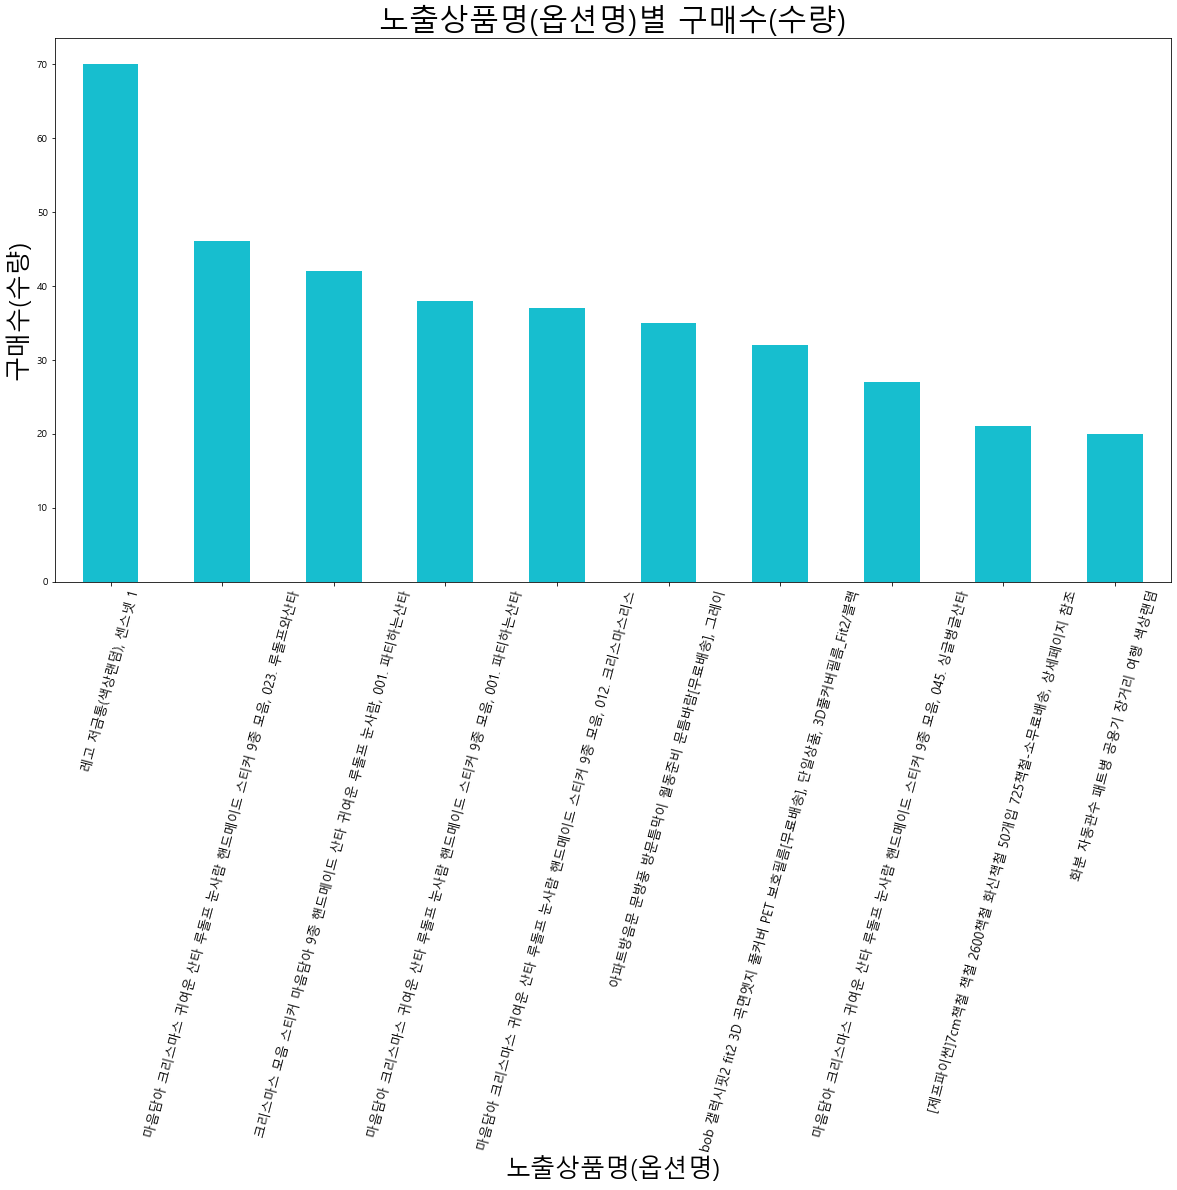

In [20]:
plot = top_selling.plot(kind='bar', color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('노출상품명(옵션명)', fontsize=25)
plot.set_ylabel('구매수(수량)', fontsize=25)
plot.set_title('노출상품명(옵션명)별 구매수(수량)', fontsize=30)
plot.set_xticklabels(labels=top_selling.index, rotation=75, fontsize=13)

plt.show()


# 노출상품명(옵션명) 중에 많이 나온 단어 빈도 조회

In [23]:
# 필요한 모듈 실행
import konlpy
from konlpy.tag import *
#wordcloud 사용 
from wordcloud import wordcloud
from collections import Counter #단어에 포함된 각 글자 수 세어준다
import nltk #토큰 데이터를 살펴볼 수 있는 라이브러리
from subprocess import check_output
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator #wordcloud 라이브러리
import matplotlib as mpl



In [24]:
okt = Okt() # Konlpy를 사용하여 한글 명사 추출 및 빈도 계산 
            # Okt(Twitter) 클래스를 사용하여 한글 명사 단어 빈도 계산 
            # 클래스 종류 - Hannanum, Kkma, Komoran, Mecab, Okt(Twitter)
kkma = Kkma() #


In [25]:
print(okt.morphs("도움되셨다면, 공감을 꾸욱 눌러주세요~"))
# morphs는 형태소 단위로 구문 분석을 수행한다 
# okt 잘 실행되는지 확인했음

['도움', '되셨다면', ',', '공감', '을', '꾸욱', '눌러주세요', '~']


## 노출상품명(옵션명) 컬럼만 데이터 저장

In [26]:
data1 = pd.read_excel('coupangdata.xlsx', usecols='L') # Usecols은 엑셀파일의 특정 행만을 데이터로 출력하고 싶을때 사용하는 파라미터

print(data1)


                                             노출상품명(옵션명)
0     마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 001...
1                                 다이얼식 비밀번호식 열쇠, 003단-소
2        현모양처 무료배송 하오츠 백탕 훠궈소스 마라탕 샹궈 재료 중국식품, 상세페이지 참조
3     bob 갤럭시핏2 fit2 3D 곡면엣지 풀커버 PET 보호필름[무료배송], 단일상...
4                      아동 성인 남녀공용 어른 겨울 뜨개실 귀마개, 00랜덤컬러
...                                                 ...
3022  [제프파이썬+할인점] @P36766 튼튼플러스요거얌얌 이츠웰 가공식품 오렌지125g...
3023     [제프파이썬+할인점] @그로비타 거북이사료 85g무료배송상품~!!, 상세페이지 참조
3024              HOME 밥주걱 홀더 받침대 거치대 가정 식당 HOLDER, 화이트
3025              HOME 밥주걱 홀더 받침대 거치대 가정 식당 HOLDER, 화이트
3026  [jepython]@[세일상품]영대 은박지 알루미늄 테이프 (48mm7M)jff20...

[3027 rows x 1 columns]


In [27]:
# morphs = 형태소 , noun = 명사 , pos = 형태소 + 품사
#okt()함수를 이용하여 주요 키워드 추출

data1.loc[:,'노출상품명(옵션명)']

0       마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음, 001...
1                                   다이얼식 비밀번호식 열쇠, 003단-소
2          현모양처 무료배송 하오츠 백탕 훠궈소스 마라탕 샹궈 재료 중국식품, 상세페이지 참조
3       bob 갤럭시핏2 fit2 3D 곡면엣지 풀커버 PET 보호필름[무료배송], 단일상...
4                        아동 성인 남녀공용 어른 겨울 뜨개실 귀마개, 00랜덤컬러
                              ...                        
3022    [제프파이썬+할인점] @P36766 튼튼플러스요거얌얌 이츠웰 가공식품 오렌지125g...
3023       [제프파이썬+할인점] @그로비타 거북이사료 85g무료배송상품~!!, 상세페이지 참조
3024                HOME 밥주걱 홀더 받침대 거치대 가정 식당 HOLDER, 화이트
3025                HOME 밥주걱 홀더 받침대 거치대 가정 식당 HOLDER, 화이트
3026    [jepython]@[세일상품]영대 은박지 알루미늄 테이프 (48mm7M)jff20...
Name: 노출상품명(옵션명), Length: 3027, dtype: object

In [28]:
## 정규식을 이용해 한글,숫자만 추출
import re
import io
k =0 

for i in data1['노출상품명(옵션명)']:
    text = re.compile('[ㄱ-ㅎ|\d\ㅏ-ㅣ|가-힣]+').findall(i)
    data1.loc[k,'노출상품명(옵션명)'] = ' '.join(text).strip()
    k+=1

In [29]:
data2 = data1.loc[:'노출상품명(옵션명)'] #정규식 처리 결과 ,특수기호와 이모지가 없는 것을 확인할 수 있다.
data2

,노출상품명(옵션명)
0,마음담아 크리스마스 귀여운 산타 루돌프 눈사람 핸드메이드 스티커 9종 모음 001 ...
1,다이얼식 비밀번호식 열쇠 003단 소
2,현모양처 무료배송 하오츠 백탕 훠궈소스 마라탕 샹궈 재료 중국식품 상세페이지 참조
3,갤럭시핏2 2 3 곡면엣지 풀커버 보호필름 무료배송 단일상품 3 풀커버필름 2 블랙
4,아동 성인 남녀공용 어른 겨울 뜨개실 귀마개 00랜덤컬러
...,...
3022,제프파이썬 할인점 36766 튼튼플러스요거얌얌 이츠웰 가공식품 오렌지125 무료배송...
3023,제프파이썬 할인점 그로비타 거북이사료 85 무료배송상품 상세페이지 참조
3024,밥주걱 홀더 받침대 거치대 가정 식당 화이트
3025,밥주걱 홀더 받침대 거치대 가정 식당 화이트


- 특수기호가 제거된 것을 확인 할 수 있다

In [30]:
#https://hwao-story.tistory.com/3
# 위 사이트 참고했음
def word_cloud_save(data2):
    mpl.rcParams['font.size']=12 
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1
    
    
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(
                    font_path = 'C:\Windows\Fonts\H2GTRE.TTF',
                    background_color = 'white',
                    stopwords = stopwords,
                    max_words = 200,
                    max_font_size=40,
                    random_state=42
    ).generate(str(data2['노출상품명(옵션명)']))


In [31]:
okt = Okt()
data2['token_item'] = data2['노출상품명(옵션명)'].apply(okt.morphs) # tokenize
data2['tagging'] = data2['노출상품명(옵션명)'].apply(okt.pos) #tokenize + 형태소 
data2['Noun'] = data2['노출상품명(옵션명)'].apply(okt.nouns)# only 명사


C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [32]:
tagging = [j for i in data2['tagging'] for j in i] #리스트로 추출
tagging

[('마음', 'Noun'),
 ('담아', 'Verb'),
 ('크리스마스', 'Noun'),
 ('귀여운', 'Adjective'),
 ('산타', 'Noun'),
 ('루돌프', 'Noun'),
 ('눈사람', 'Noun'),
 ('핸드', 'Noun'),
 ('메이드', 'Noun'),
 ('스티커', 'Noun'),
 ('9', 'Number'),
 ('종', 'Noun'),
 ('모음', 'Noun'),
 ('001', 'Number'),
 ('파티', 'Noun'),
 ('하는', 'Verb'),
 ('산타', 'Noun'),
 ('다이얼', 'Noun'),
 ('식', 'Suffix'),
 ('비밀번호', 'Noun'),
 ('식', 'Suffix'),
 ('열쇠', 'Noun'),
 ('003', 'Number'),
 ('단', 'Noun'),
 ('소', 'Noun'),
 ('현모양처', 'Noun'),
 ('무료', 'Noun'),
 ('배송', 'Noun'),
 ('하오츠', 'Noun'),
 ('백탕', 'Noun'),
 ('훠궈', 'Noun'),
 ('소스', 'Noun'),
 ('마라', 'Adjective'),
 ('탕', 'Noun'),
 ('샹궈', 'Noun'),
 ('재료', 'Noun'),
 ('중국', 'Noun'),
 ('식품', 'Noun'),
 ('상세', 'Noun'),
 ('페이지', 'Noun'),
 ('참조', 'Noun'),
 ('갤럭시', 'Noun'),
 ('핏', 'Noun'),
 ('2', 'Number'),
 ('2', 'Number'),
 ('3', 'Number'),
 ('곡면', 'Noun'),
 ('엣지', 'Noun'),
 ('풀', 'Noun'),
 ('커버', 'Noun'),
 ('보호', 'Noun'),
 ('필름', 'Noun'),
 ('무료', 'Noun'),
 ('배송', 'Noun'),
 ('단일', 'Noun'),
 ('상품', 'Noun'),
 ('3', 'Number')

In [33]:
print(len(tagging)) #53633

53633


In [34]:
#빈도수 높은 탑 10단어 추출
#형태소 분석 및 품사 태깅
tokens = [ take2 for take1 in data2['token_item'] for take2 in take1]
text = nltk.Text(tokens, name='NMSC')
print(text.vocab().most_common(10)) #상위10
print(text.vocab().most_common()[:-20:-1]) #하위 10

[('제프', 1888), ('배송', 1876), ('무료', 1863), ('파이썬', 1860), ('상세', 1714), ('페이지', 1714), ('참조', 1714), ('상품', 1578), ('할인점', 1352), ('2021', 570)]
[('85', 1), ('거북이', 1), ('그로', 1), ('얌얌', 1), ('36766', 1), ('인디', 1), ('발톱깎이', 1), ('개시', 1), ('더펫', 1), ('마루', 1), ('6835', 1), ('색견출', 1), ('플래그', 1), ('먹물', 1), ('대명', 1), ('지속', 1), ('8시간', 1), ('자극', 1), ('쑥갓', 1)]


In [35]:
tokens = [ take2 for take1 in data2['token_item'] for take2 in take1]
len(tokens)

53633

In [36]:
#입력한 키워드와 같이 나온 토큰을 보여줌 fL:연관 검색어
text = nltk.Text(tokens, name='NMSC')
text.concordance('무료')

Displaying 25 of 1863 matches:
파티 하는 산타 다이얼 식 비밀번호 식 열쇠 003 단 소 현모양처 무료 배송 하오츠 백탕 훠궈 소스 마라 탕 샹궈 재료 중국 식품 상세 페
세 페이지 참조 갤럭시 핏 2 2 3 곡면 엣지 풀 커버 보호 필름 무료 배송 단일 상품 3 풀 커버 필름 2 블랙 아동 성인 남녀 공용 어
색 1321 엘리펀트 그레이 대 용량 식 자재 반찬 소시지 사조 1 무료 배송 상세 페이지 참조 범퍼 케이스 그립 톡 아이폰 글라스 12 미
참조 범퍼 케이스 그립 톡 아이폰 글라스 12 미러 하트 스마트 톡 무료 배송 단일 상품 실버 갤럭시 핏 2 2 3 곡면 엣지 풀 커버 보호
단일 상품 실버 갤럭시 핏 2 2 3 곡면 엣지 풀 커버 보호 필름 무료 배송 단일 상품 3 풀 커버 필름 2 블랙 마향 마라 탕용 소스 1
디자인 에트 로 갤럭시 핏 2 2 3 곡면 엣지 풀 커버 보호 필름 무료 배송 단일 상품 3 풀 커버 필름 2 블랙 간편한 시공 주방 욕실 
이 오염 방지 방수 테이프 곰팡이 방수 테이프 오염 방지 욕실 틈새 무료 배송 00 단 품 실버 소품 10 집게 형 걸이 고리 걸이 형 봉 
 배송 00 단 품 실버 소품 10 집게 형 걸이 고리 걸이 형 봉 무료 배송 상세 페이지 참조 상세 페이지 참조 92 핑코앤 루리 캐릭터 
이지 참조 상세 페이지 참조 92 핑코앤 루리 캐릭터 케이스 920 무료 배송 03 하트 패턴 스마 토 별 비트 소켓 무료 배송 073 8 
터 케이스 920 무료 배송 03 하트 패턴 스마 토 별 비트 소켓 무료 배송 073 8 45 설치 가 간단한 빨래 줄 15 갤럭시 핏 2 
 빨래 줄 15 갤럭시 핏 2 2 3 곡면 엣지 풀 커버 보호 필름 무료 배송 단일 상품 3 풀 커버 필름 2 블랙 나비 다이어리 갤럭시 3
 상품 3 풀 커버 필름 2 블랙 나비 다이어리 갤럭시 31 315 무료 배송 단일 상품 01 블랙 갤럭시 21 쉬움 우레 탄 풀 커버 필름
랙 갤럭시 21 쉬움 우레 탄 풀 커버

제프 : 1888
배송 : 1876
무료 : 1863
파이썬 : 1860
상세 : 1714
페이지 : 1714
참조 : 1714
상품 : 1578
할인점 : 1352
산타 : 440
크리스마스 : 348
루돌프 : 339
스티커 : 280
눈사람 : 258
핸드 : 251
모음 : 237
마음 : 235
메이드 : 230
블랙 : 211
세트 : 172
밴드 : 159
커버 : 154
걸이 : 145
갤럭시 : 143
케이스 : 142
필름 : 137
보호 : 119


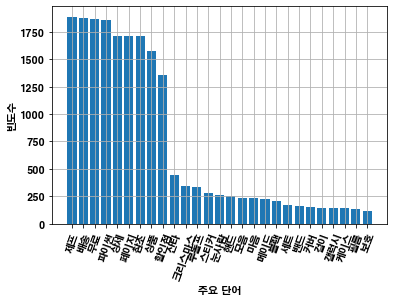

In [37]:
# 라이브러리 다시 불러오기 
from collections import Counter
import matplotlib
from matplotlib import font_manager,rc

matplotlib.rcParams['axes.unicode_minus'] = False
#그래프에서 마이너스 기호가 표시되도록 하는 설정

def showGraph(wordInfo):
    
    font_location = "C:\Windows\Fonts\H2GTRE.TTF"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font',family=font_name)
    
    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    
    Sorted_Dict_Values = sorted(wordInfo.values(),reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo,key=wordInfo.get,reverse=True)
    
    plt.bar(range(len(wordInfo)),Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')
        
    plt.show()
    
  
noun_text = [ take2 for take1 in data2['Noun'] for take2 in take1]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
wordInfo = dict()
for tags, counts in text.vocab().most_common(30):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts
        print ("%s : %d" % (tags, counts))
            
showGraph(wordInfo)

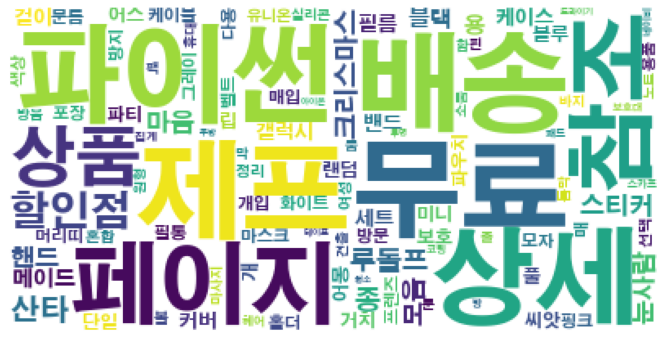

In [38]:
#'stopwords' is not defined 해결방안 - 밑에 2번줄 실행하기
from nltk.corpus import stopwords

data = text.vocab().most_common(100)

wordcloud = WordCloud(
    font_path= 'C:\Windows\Fonts\H2GTRE.TTF',
    relative_scaling=0.4,
    stopwords = stopwords,
    background_color='white',
).generate_from_frequencies( dict(data) )


plt.figure( figsize=(12, 6) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()